In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

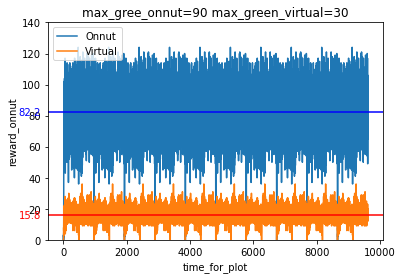

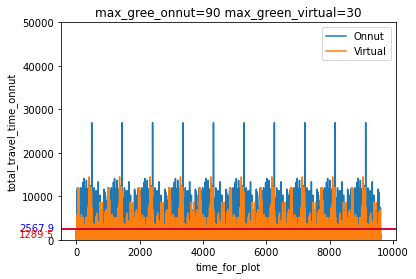

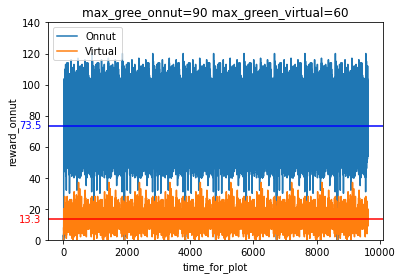

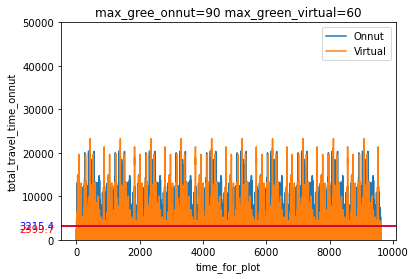

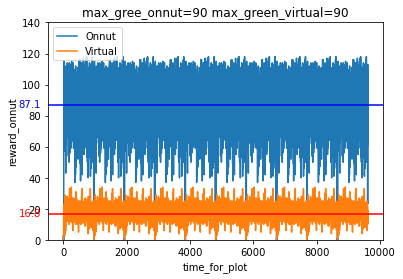

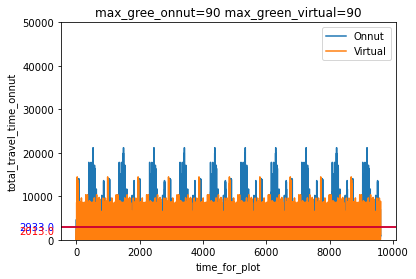

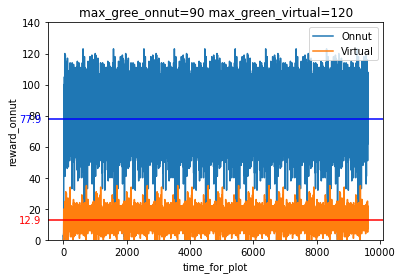

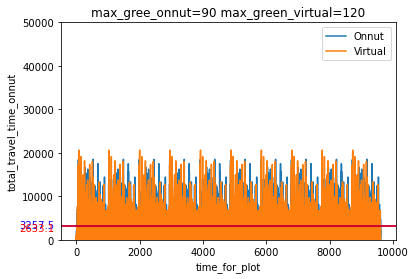

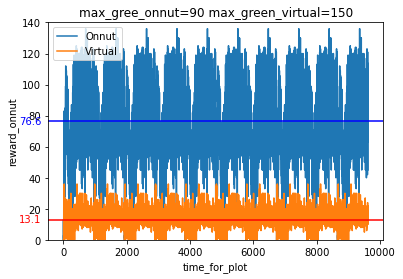

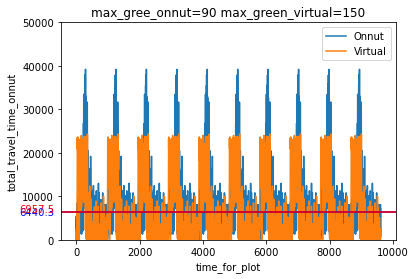

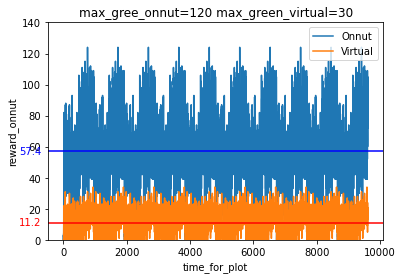

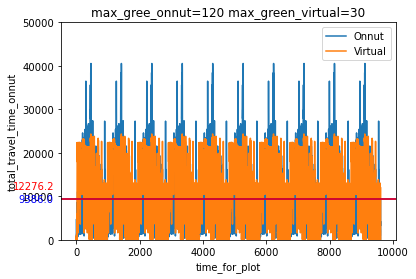

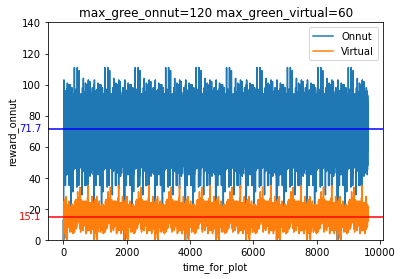

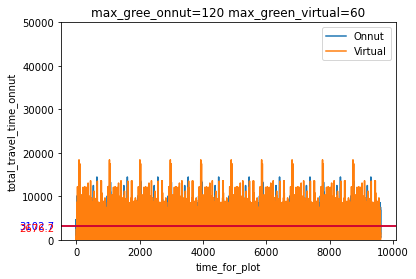

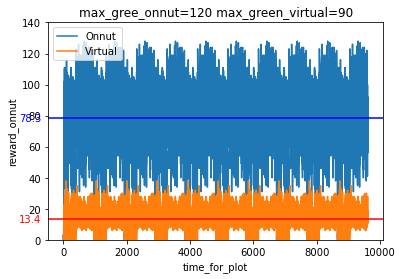

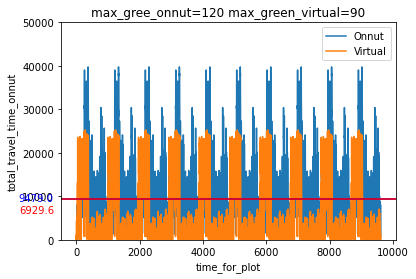

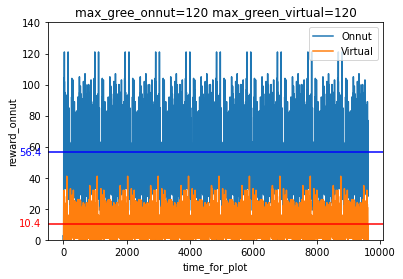

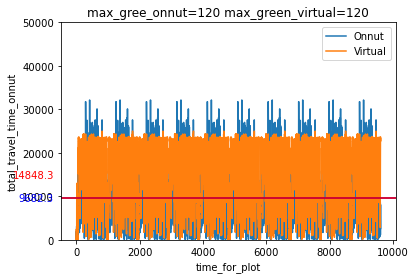

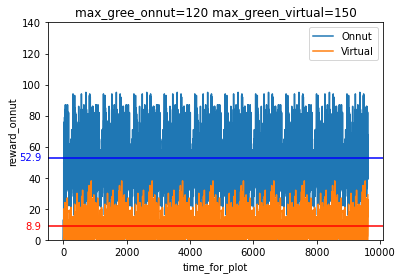

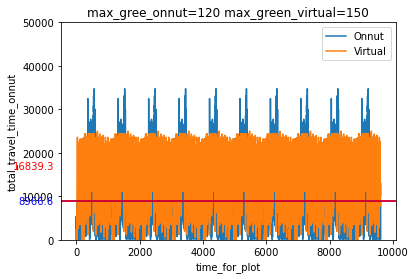

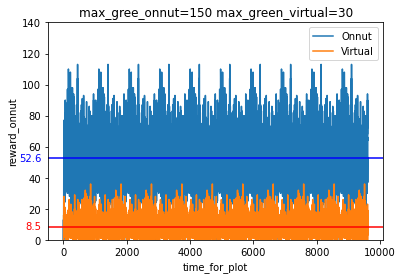

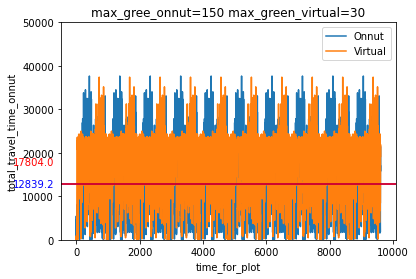

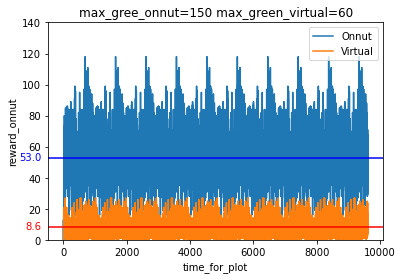

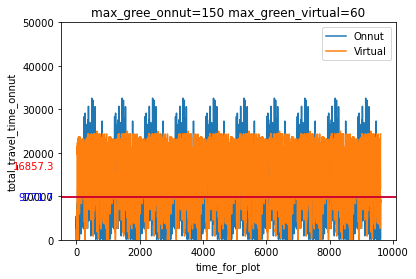

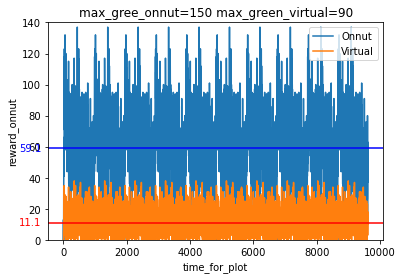

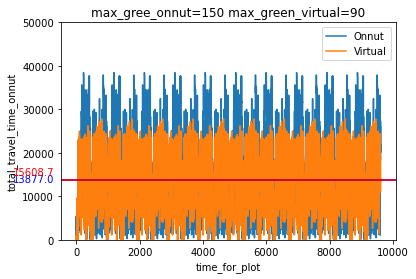

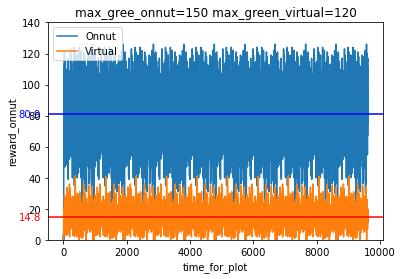

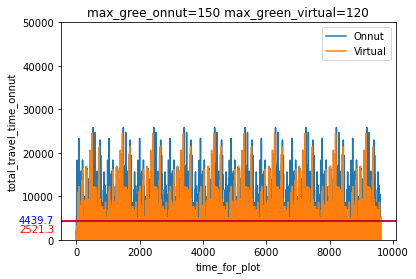

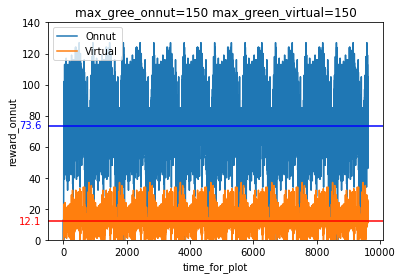

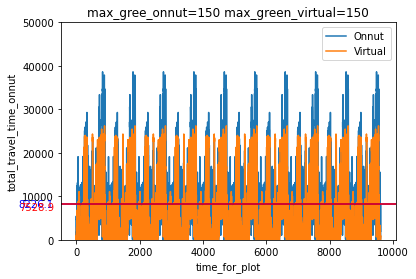

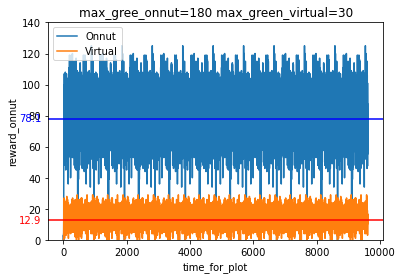

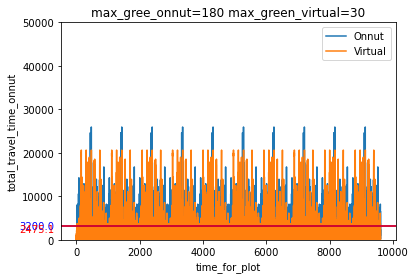

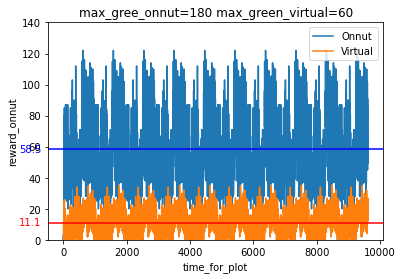

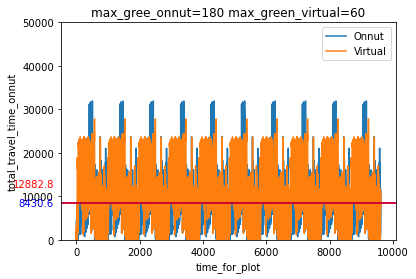

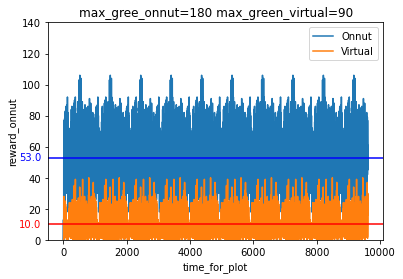

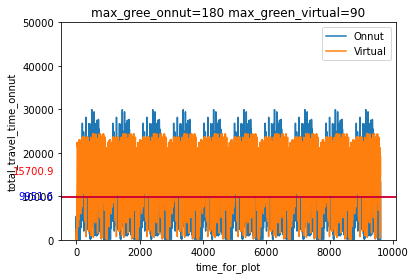

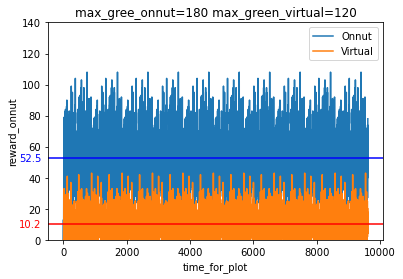

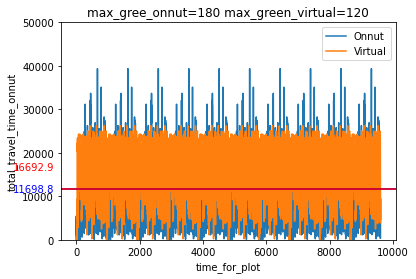

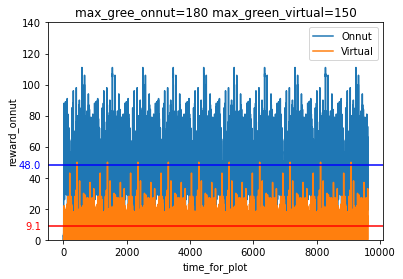

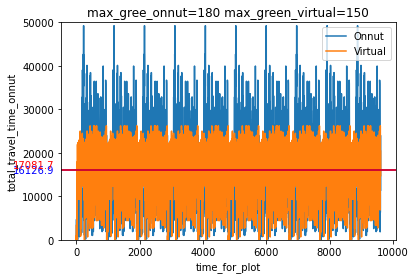

In [18]:
folder_path = 'C:\\Users\\Asus\\OneDrive - Chulalongkorn University\\Desktop\\Senior Project\\Experiments-with-DQN-Onnut-27042022\\Experiments-with-DQN-Onnut-21042022\\multi-agent-dqn-main\\RL_max_green_tuning\\RL-parameter-tunning'
figure_output_path = 'C:\\Users\\Asus\\OneDrive - Chulalongkorn University\\Desktop\\Senior Project\\Experiments-with-DQN-Onnut-27042022\\Experiments-with-DQN-Onnut-21042022\\multi-agent-dqn-main\\figure_max_green'

max_green_df = {'pairs':[],'reward_onnut':[],'reward_virtual':[],'travel_time':[]}

max_green_ONNUT_list = [90,120,150,180]
max_green_VIRTUAL_list = [30,60,90,120,150]
for max_green_ONNUT in max_green_ONNUT_list :
    for max_green_VIRTUAL in max_green_VIRTUAL_list :

        max_green_df['pairs'].append((max_green_ONNUT,max_green_VIRTUAL))
        sub_folder_path = os.path.join(folder_path,(str(max_green_ONNUT)+'-'+str(max_green_VIRTUAL)))

        for i in range(10) :
            file_name = 'onnut-dqn_onnut{onnut}_virtual{virtual}_run{run}.csv'.format(onnut=max_green_ONNUT,virtual=max_green_VIRTUAL,run=i)
            file_path = os.path.join(sub_folder_path,file_name)
            if i == 0 :
                output_df = pd.read_csv(file_path)
                output_df['episode'] = i
            else :
                new_output_df = pd.read_csv(file_path)
                new_output_df['episode'] = i
                output_df = pd.concat([output_df,new_output_df])
        
        output_df['step_time'] = output_df['step_time'].astype(int)
        output_df['episode_time'] = output_df['episode'].astype(str) +'_' + output_df['step_time'].astype(str)
        # print(output_df.shape)
        # print(output_df.info())
        # print(output_df.head(20))
        output_df['time_for_plot'] = [i for i in range(9610)]
        output_df.reset_index(inplace=True)

        reward_onnut_mean = output_df['reward_onnut'].mean()
        reward_virtual_mean = output_df['reward_virtual'].mean()

        # reward_onnut_mean = output_df['reward_onnut'].sum()
        # reward_virtual_mean = output_df['reward_virtual'].sum()

        max_green_df['reward_onnut'].append("{:.2f}".format(reward_onnut_mean))
        max_green_df['reward_virtual'].append("{:.2f}".format(reward_virtual_mean))

        travel_time_onnut_mean = output_df['total_travel_time_onnut'].mean()
        travel_time_virtual_mean = output_df['total_travel_time_virtual'].mean()

        max_green_df['travel_time'].append(("{:.2f}".format(travel_time_onnut_mean),"{:.2f}".format(travel_time_virtual_mean)))

        # sns.lineplot(data=output_df,x='time_for_plot',y='reward_onnut',hue='episode') \
        #             .set(title='max_gree_onnut={t1} max_green_virtual={t2}'.format(t1=max_green_ONNUT,t2=max_green_VIRTUAL))
        # sns.lineplot(data=output_df,x='time_for_plot',y='reward_virtual',hue='episode')
        fig, ax=plt.subplots()
        plt.ylim([0,140])

        sns.lineplot(data=output_df,x='time_for_plot',y='reward_onnut') \
            .set(title='max_gree_onnut={t1} max_green_virtual={t2}'.format(t1=max_green_ONNUT,t2=max_green_VIRTUAL))

        sns.lineplot(data=output_df,x='time_for_plot',y='reward_virtual')

        plt.axhline(y = reward_onnut_mean, color = 'b', linestyle = '-')
        trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
        ax.text(0,reward_onnut_mean, "{:.1f}".format(reward_onnut_mean), color="b", transform=trans, ha="right", va="center")

        plt.axhline(y = reward_virtual_mean , color = 'r', linestyle = '-')
        trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
        ax.text(0,reward_virtual_mean, "{:.1f}".format(reward_virtual_mean), color="r", transform=trans, ha="right", va="center")

        plt.legend(labels=["Onnut","Virtual"])
        fig.savefig(os.path.join(figure_output_path,"reward_{t1}_{t2}.png".format(t1=max_green_ONNUT,t2=max_green_VIRTUAL)))

        plt.show()
        plt.close()

        fig, ax=plt.subplots()
        plt.ylim([0,50000])
        sns.lineplot(data=output_df,x='time_for_plot',y='total_travel_time_onnut') \
            .set(title='max_gree_onnut={t1} max_green_virtual={t2}'.format(t1=max_green_ONNUT,t2=max_green_VIRTUAL))

        sns.lineplot(data=output_df,x='time_for_plot',y='total_travel_time_virtual')

        plt.axhline(y = travel_time_onnut_mean, color = 'b', linestyle = '-')
        trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
        ax.text(0,travel_time_onnut_mean, "{:.1f}".format(travel_time_onnut_mean), color="b", transform=trans, ha="right", va="center")

        plt.axhline(y = travel_time_onnut_mean , color = 'r', linestyle = '-')        
        trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
        ax.text(0,travel_time_virtual_mean, "{:.1f}".format(travel_time_virtual_mean), color="r", transform=trans, ha="right", va="center")
        plt.legend(labels=["Onnut","Virtual"])
        fig.savefig(os.path.join(figure_output_path,"travel_time_{t1}_{t2}.png".format(t1=max_green_ONNUT,t2=max_green_VIRTUAL)))
        plt.show()
        plt.close()

In [19]:
max_green_df = pd.DataFrame(max_green_df)

max_green_df.to_csv(os.path.join(figure_output_path,'max_green_output.csv'))